## Task 1: Image classification with CNN on Fashion MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
from numpy.lib.stride_tricks import as_strided

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
# divide train into train and val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [3]:
#data shape 

print("train data shape: ", x_train.shape)
print("train target shape: ", y_train.shape)

print("validation data shape: ", x_val.shape)
print("validation target shape: ", y_val.shape)

print("test data shape: ", x_test.shape)
print("test target shape: ", y_test.shape)

train data shape:  (48000, 28, 28)
train target shape:  (48000,)
validation data shape:  (12000, 28, 28)
validation target shape:  (12000,)
test data shape:  (10000, 28, 28)
test target shape:  (10000,)


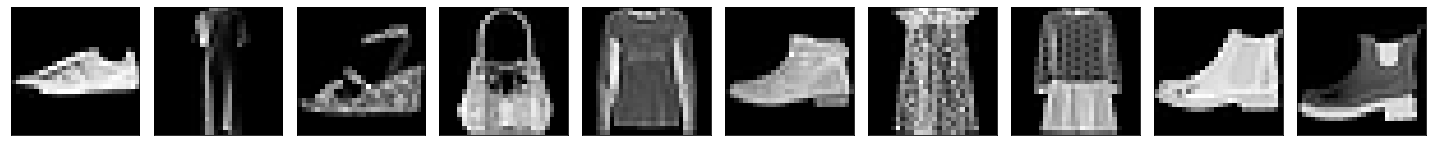

In [4]:
def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(X[i], cmap='gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
    
    
overview(0, 10, x_train)

Data preprocessing

In [5]:
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print("train data shape: ", x_train.shape)
print("validation data shape: ", x_val.shape)
print("test data shape: ", x_test.shape)

train data shape:  (48000, 28, 28, 1)
validation data shape:  (12000, 28, 28, 1)
test data shape:  (10000, 28, 28, 1)


Normalizing data

In [6]:
x_train_norm = x_train.astype('float32')
x_val_norm = x_val.astype('float32')
x_test_norm = x_test.astype('float32')

x_train_norm /= 255.
x_val_norm /= 255.
x_test_norm /= 255.

In [7]:
from tensorflow.keras.utils import to_categorical 

num_labels = 10
y_train = to_categorical(y_train, num_labels)
y_val = to_categorical(y_val, num_labels)
y_test = to_categorical(y_test, num_labels)

In [8]:
image_size=28
num_epochs=25


model = models.Sequential()

model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu',
                 input_shape=(image_size, image_size, 1)))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), padding='same', activation='relu',
                 input_shape=(image_size, image_size, 1)))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256))
model.add(layers.Activation('relu'))

model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               401664    
_________________________________________________________________
activation (Activation)      (None, 256)               0

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

run_hist = model.fit(
    np.array(x_train_norm), np.array(y_train),
    epochs=num_epochs, 
    validation_data=(np.array(x_val_norm), np.array(y_val)))

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4335 - accuracy: 0.8437 - val_loss: 0.3141 - val_accuracy: 0.8835
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2910 - accuracy: 0.8928 - val_loss: 0.2787 - val_accuracy: 0.8943
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2464 - accuracy: 0.9085 - val_loss: 0.2495 - val_accuracy: 0.9077
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2133 - accuracy: 0.9208 - val_loss: 0.2352 - val_accuracy: 0.9132
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1887 - accuracy: 0.9298 - val_loss: 0.2390 - val_accuracy: 0.9112
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1639 - accuracy: 0.9384 - val_loss: 0.2421 - val_accuracy: 0.9137
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1418 - accuracy: 0.9469 - val_loss: 0.2443 - val_accuracy:

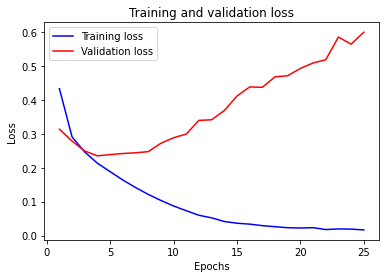

In [11]:
import matplotlib.pyplot as plt

loss_values = run_hist.history["loss"]
validation_loss_val = run_hist.history["val_loss"]

epochs = range(1, num_epochs+1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

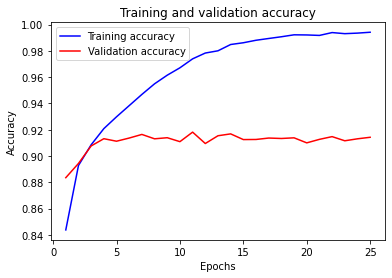

In [12]:
train_acc = run_hist.history['accuracy']
validation_acc = run_hist.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
scores = model.evaluate(x_test_norm, y_test, batch_size=64)
print(scores)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

157/157 [==============================] - 1s 4ms/step - loss: 0.6529 - accuracy: 0.9116
[0.6529476642608643, 0.9115999937057495]
Loss: 0.6529476642608643
Accuracy: 0.9115999937057495


[Text(0.5, 123.0, 'Predicted label'), Text(168.0, 0.5, 'True label')]

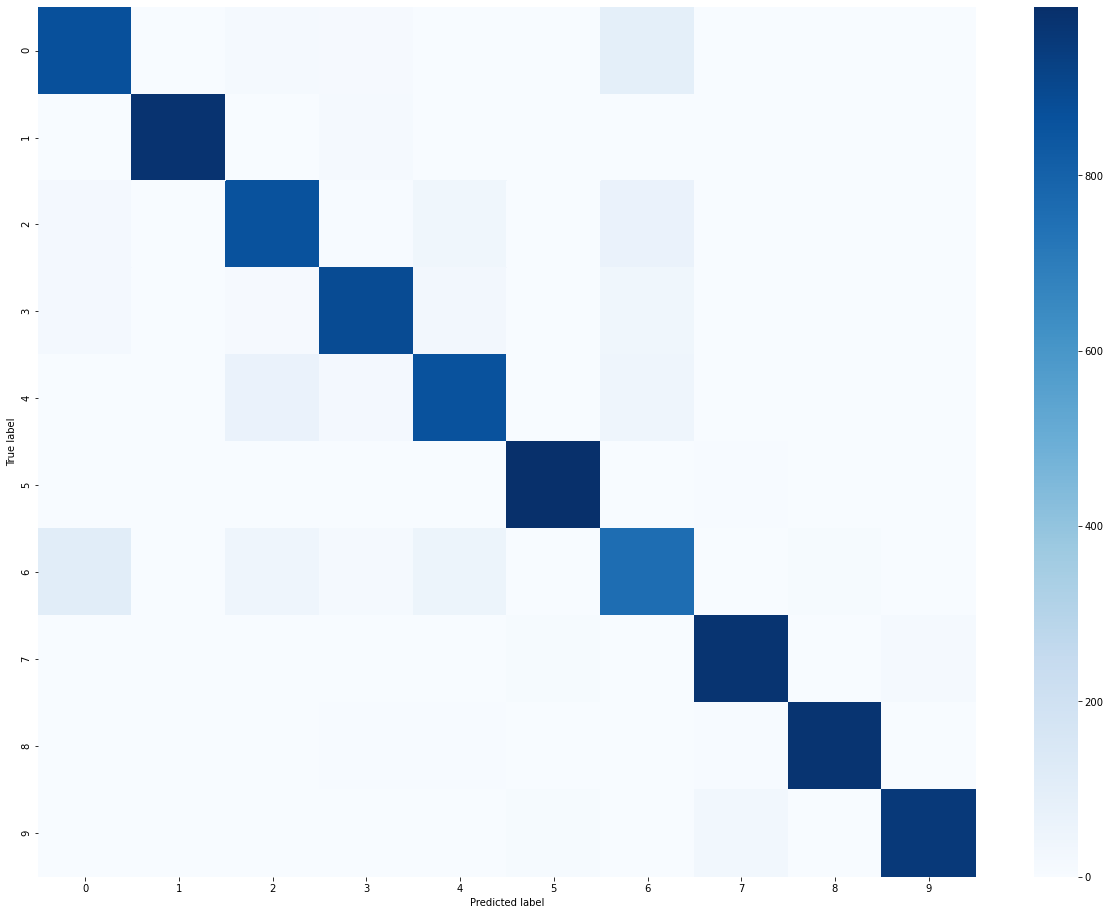

In [14]:
y_pred = [np.argmax(i) for i in model.predict(x_test_norm)]
y_true = np.asarray([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm)

plt.figure(figsize = (21,16))
ax = sn.heatmap(df_cm, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=[-5, 5],
    height_shift_range=[-5, 5],
    horizontal_flip=True,
    vertical_flip=True,
)

batch_size = 32

datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

num_train_batches = len(x_train) // batch_size
num_train_batches += (0 if len(x_train) % batch_size == 0 else 1)     
num_val_batches = len(x_val) // batch_size
num_val_batches += (0 if len(x_val) % batch_size == 0 else 1)     
num_test_batches = len(x_test) // batch_size
num_test_batches += (0 if len(x_test) % batch_size == 0 else 1)  

In [16]:
train_generator = datagen_train.flow(x_train, y_train, 
                                     batch_size=batch_size,
                                     seed=123)
val_generator = datagen_train.flow(x_val, y_val, 
                                     batch_size=batch_size,
                                     seed=123)
test_generator = datagen_test.flow(x_test, y_test, 
                                   batch_size=batch_size,
                                   seed=123)

In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = num_train_batches, 
                              epochs = num_epochs,
                              validation_data = val_generator,
                              validation_steps = num_val_batches)

C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1500/1500 [==============================] - 20s 13ms/step - loss: 22.3784 - accuracy: 0.3506 - val_loss: 1.5349 - val_accuracy: 0.4278
Epoch 2/25
1500/1500 [==============================] - 18s 12ms/step - loss: 1.3926 - accuracy: 0.4821 - val_loss: 1.3369 - val_accuracy: 0.5098
Epoch 3/25
1500/1500 [==============================] - 18s 12ms/step - loss: 1.2567 - accuracy: 0.5233 - val_loss: 1.2227 - val_accuracy: 0.5530
Epoch 4/25
1500/1500 [==============================] - 18s 12ms/step - loss: 1.1947 - accuracy: 0.5465 - val_loss: 1.1814 - val_accuracy: 0.5502
Epoch 5/25
1500/1500 [==============================] - 17s 11ms/step - loss: 1.1296 - accuracy: 0.5669 - val_loss: 1.1263 - val_accuracy: 0.5723
Epoch 6/25
1500/1500 [==============================] - 17s 11ms/step - loss: 1.0844 - accuracy: 0.5810 - val_loss: 1.0573 - val_accuracy: 0.5931
Epoch 7/25
1500/1500 [==============================] - 17s 11ms/step - loss: 1.0364 - accuracy: 0.5985 - val_loss: 1.0421 

In [18]:
loss, acc = model.evaluate_generator(test_generator, 
                                     steps=num_test_batches,
                                     verbose=1)

 24/313 [=>............................] - ETA: 1s - loss: 5.0241 - accuracy: 0.1784

C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


313/313 [==============================] - 1s 4ms/step - loss: 4.8035 - accuracy: 0.2168


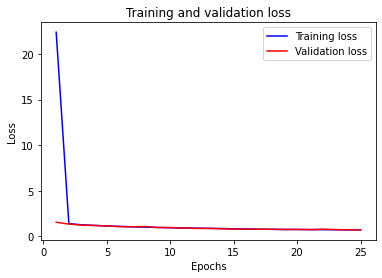

In [19]:
loss_values = history.history["loss"]
validation_loss_val = history.history["val_loss"]

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, validation_loss_val, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

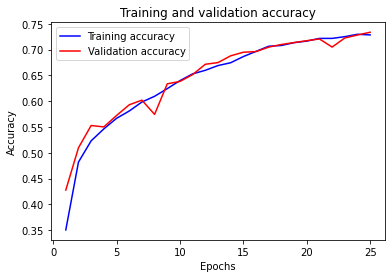

In [20]:
train_acc = history.history['accuracy']
validation_acc = history.history["val_accuracy"]

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Task 2. Implement pooling layer

In [21]:
def pooling2d(X, kernel_size, stride, padding=0, pool_mode='max'):
    
    X = np.pad(X, padding, mode='constant')
        
    out_height = int(np.floor(1 + (X.shape[0] - kernel_size) // stride))
    out_width = int(np.floor(1 + (X.shape[1] - kernel_size) // stride))
    shape_p = (out_height, out_width, kernel_size, kernel_size)
    strides_p = (stride * X.strides[0], stride * X.strides[1], X.strides[0], X.strides[1])
    
    X_strided = as_strided(X, shape_p, strides_p)

    if pool_mode == 'max':
        return X_strided.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return X_strided.mean(axis=(2, 3))

In [22]:
X = np.array([[7, 9, 22, 41],
              [11, 2, 12, 6],
              [2, 4, 6, 8],
              [3, 5, 7, 9]])

In [23]:
pooling2d(X, kernel_size=2, stride=2, padding=0, pool_mode='max')

array([[11, 41],
       [ 5,  9]])

In [24]:
pooling2d(X, kernel_size=2, stride=2, padding=0, pool_mode='avg')

array([[ 7.25, 20.25],
       [ 3.5 ,  7.5 ]])

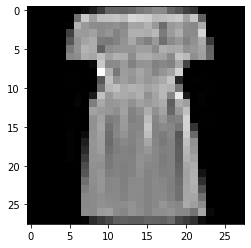

In [25]:
img = x_train[10].reshape(28, 28)
plt.imshow(img, cmap='gray')

In [26]:
img_max_pool = pooling2d(img, kernel_size=2, stride=1, padding=1, pool_mode='max')

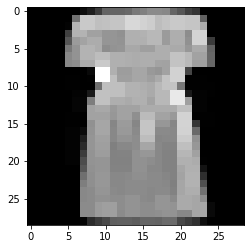

In [27]:
plt.imshow(img_max_pool, cmap='gray')

In [28]:
print(img_max_pool[0])

[  0   0   0   0   0   0   0  13  30  59  99 101 101 105 122 128 139 139
 136 101  86  63  51   0   0   0   0   0   0]


In [29]:
img_avg_pool = pooling2d(img, kernel_size=2, stride=1, padding=1, pool_mode='avg')

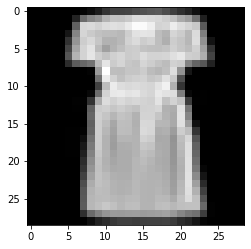

In [30]:
plt.imshow(img_avg_pool, cmap='gray')

In [31]:
print(img_avg_pool[1])

[  0.     0.     0.     0.     0.     0.    28.25  81.75 101.25 110.25
 135.5  147.5  146.   151.75 163.25 166.25 164.25 162.25 155.25 145.75
 128.   118.25  86.25  24.25   0.     0.     0.     0.     0.  ]
